In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
PV = 400000*0.8
N = 30*12
month_rate = 0.071/12

In [27]:
a = (1+month_rate)**N
PMT = round(PV*month_rate*a/(a-1))

In [32]:
principal_balance = np.zeros(N + 1)
interest_paid = np.zeros(N)
principal_paid = np.zeros(N)

In [34]:
principal_balance[0] = PV
for i in range(N):
    interest_paid[i] = np.round(principal_balance[i] * month_rate, 2)
    principal_paid[i] = PMT - interest_paid[i]
    principal_balance[i + 1] = np.round(principal_balance[i] - principal_paid[i], 2)

In [36]:
principal_balance[-1] = 0
principal_paid[-1] = principal_balance[-2]

In [37]:
PMT_1 = PMT+np.zeros(N)
PMT_1[-1] = principal_balance[-2]+interest_paid[-1]

In [44]:
final_payment = PMT_1[-1]
final_balance = principal_balance[-1]
total_interest_paid = np.sum(interest_paid)
total_principal_paid = np.sum(principal_paid)
total_payments_amount = total_interest_paid + total_principal_paid

print(f"Monthly Payment: ${PMT}")
print(f"Final Payment: ${final_payment}")
print(f"Final Balance: ${final_balance}")
print(f"Total Interest Paid: ${total_interest_paid}")
print(f"Total Principal Paid: ${total_principal_paid}")
print(f"Total Payments: ${total_payments_amount:.2f}")

Monthly Payment: $2151
Final Payment: $1531.67
Final Balance: $0.0
Total Interest Paid: $453740.67
Total Principal Paid: $320000.0
Total Payments: $773740.67


In [1]:
# Plot

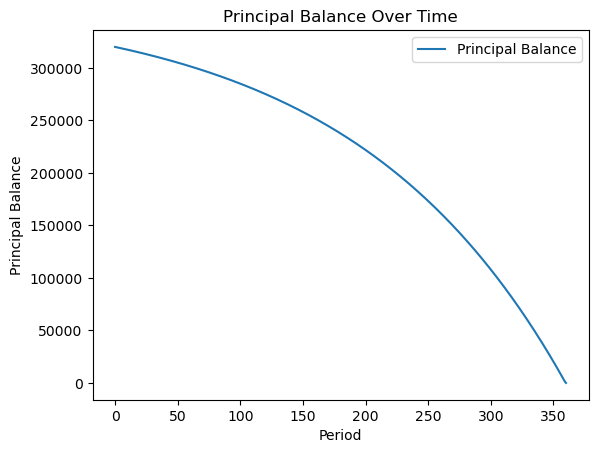

In [43]:
N_new = np.linspace(0, N, N+1)
plt.plot(N_new, principal_balance, label='Principal Balance')
plt.xlabel('Period')
plt.ylabel('Principal Balance')
plt.title('Principal Balance Over Time')
plt.legend()

## Q3

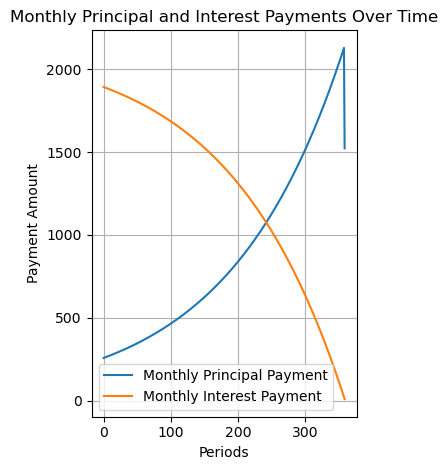

In [14]:
plt.subplot(1, 2, 2)
plt.plot(N_new[:-1], principal_paid, label='Monthly Principal Payment')
plt.plot(N_new[:-1], interest_paid, label='Monthly Interest Payment')
plt.xlabel('Periods')
plt.ylabel('Payment Amount')
plt.title('Monthly Principal and Interest Payments Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
# Point

In [17]:
def present_value_of_mortgage(point, interest_rate, k):
    month_new = (0.071-0.25*point)/12
    a_new = (1+month_new)**N
    PMT_new = round(PV*month_new*a_new/(a_new-1))
    pb_new = np.zeros(N + 1)
    ip_new = np.zeros(N)
    pp_new = np.zeros(N)
    pb_new[0] = PV
    for i in range(N):
        ip_new[i] = np.round(pb_new[i] * month_new, 2)
        pp_new[i] = PMT_new - ip_new[i]
        pb_new[i + 1] = np.round(pb_new[i] - pp_new[i], 2)
    pb_new[-1] = 0 
    pp_new[-1] = pb_new[-2]
    PMT_new_1 = PMT_new+np.zeros(N)
    PMT_new_1[-1] = pb_new[-2]+ip_new[-1]
    B = pb_new[k]
    PMT_m = PMT_new_1[0:k]
    i_a = (1+interest_rate)**(1/12)
    c = np.linspace(1, k, k)
    PMT_t = np.sum(PMT_m/(i_a**c))
    PVM = PMT_t + B/(i_a**k) + point*PV
    return PVM

## Q2

In [19]:
N_2 = np.linspace(1, N, N)

In [20]:
pvm = np.zeros(361)
pvm_1 = np.zeros(361)
diff = np.zeros(361)
for i in range(361):
    pvm_1[i]=present_value_of_mortgage(0,0.04,i)
    pvm[i]=present_value_of_mortgage(0.01,0.04,i)
    diff[i] = pvm[i] - pvm_1[i]
minimum = abs(diff).argmin()
print(minimum)

53


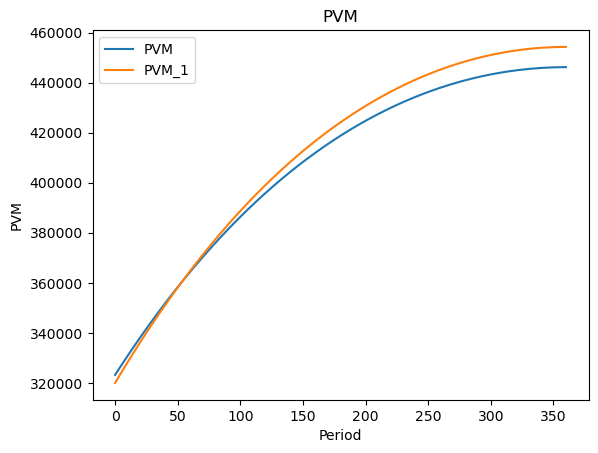

In [21]:
plt.plot(N_new, pvm, label='PVM')
plt.plot(N_new, pvm_1, label='PVM_1')
plt.xlabel('Period')
plt.ylabel('PVM')
plt.title('PVM')
plt.legend()

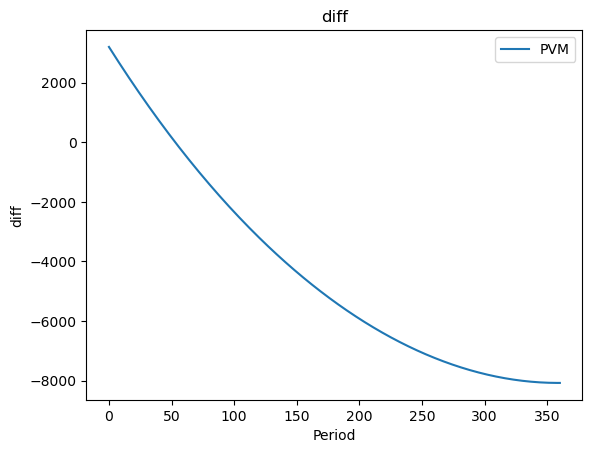

In [22]:
plt.plot(N_new, diff, label='PVM')
plt.xlabel('Period')
plt.ylabel('diff')
plt.title('diff')
plt.legend()

As the graphs shown above, the difference between pvm and pvm_1 would be negative after 53 months. Therefore, it's worth to pay points after 53 months. Before 53 months, it isn't worth to pay.